In [1]:
import os
import time
import math
import random
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numba import jit

from jmetal.core.problem import PermutationProblem
from jmetal.core.solution import PermutationSolution

from jmetal.algorithm.singleobjective import genetic_algorithm

from jmetal.operator import mutation
from jmetal.operator import crossover

from jmetal.operator import BestSolutionSelection

from jmetal.util import termination_criterion

In [2]:
# Define problem Class

# add a method to get the actual values for each city to be plotted.

class myTSP(PermutationProblem):
    def __init__(self, instance: str = None):
        super(myTSP, self).__init__()

        distance_matrix, number_of_cities = self.__read_from_file(instance)
        self.distance_matrix = distance_matrix
        self.number_of_variables = number_of_cities

        self.obj_directions = [self.MINIMIZE]
        self.number_of_objectives = 1
        self.number_of_constraints = 0

    def __read_from_file(self, filename: str):
        if filename is None:
            raise FileNotFoundError('Filename can not be None')
        with open(filename) as file:
            lines = file.readlines()
            data = [line.lstrip() for line in lines if line != ""]
            dimension = re.compile(r'[^\d]+')
            for item in data:
                if item.startswith('DIMENSION'):
                    dimension = int(dimension.sub('', item))
                    break
            c = [-1.0] * (2 * dimension)
            for item in data:
                if item[0].isdigit():
                    j, city_a, city_b = [float(x.strip()) for x in item.split(' ')]
                    c[2 * (int(j) - 1)] = city_a
                    c[2 * (int(j) - 1) + 1] = city_b
            matrix = [[-1] * dimension for _ in range(dimension)]
            for k in range(dimension):
                matrix[k][k] = 0
                for j in range(k + 1, dimension):
                    dist = math.sqrt((c[k * 2] - c[j * 2]) ** 2 + (c[k * 2 + 1] - c[j * 2 + 1]) ** 2)
                    dist = round(dist)
                    matrix[k][j] = dist
                    matrix[j][k] = dist
            return matrix, dimension
        
#     @jit(nopython=True)
    def evaluate(self, solution: PermutationSolution) -> PermutationSolution:
        fitness = 0
        for i in range(self.number_of_variables - 1):
            x = solution.variables[i]
            y = solution.variables[i + 1]
            fitness += self.distance_matrix[x][y]
        first_city, last_city = solution.variables[0], solution.variables[-1]
        fitness += self.distance_matrix[first_city][last_city]
        solution.objectives[0] = fitness
        eval_fitness.append(fitness)
        return solution

    def create_solution(self) -> PermutationSolution:
        new_solution = PermutationSolution(number_of_variables=self.number_of_variables,
                                           number_of_objectives=self.number_of_objectives)
        new_solution.variables = random.sample(range(self.number_of_variables), k=self.number_of_variables)
        return new_solution

    @property
    def number_of_cities(self):
        return self.number_of_variables

    def get_name(self):
        return 'Symmetric TSP'

In [3]:
# function to run selected algorithm on defined problem



In [4]:
# function to make print report of function solving

def print_solution(dimension, my_algo, pop_evolved, log, niter, duration):
    algorithm_name = my_algo.get_name()
    parameters = my_algo.get_extra_info()
    solution_x = pop_evolved.champion_x
    fitness = pop_evolved.champion_f[0]-funcbias
    n_evals = pop_evolved.problem.get_fevals()
    
    print("Function: %s" % funcs_dispname[func_name])
    print("Problem dimension: %d" % dimension)
    print("Search Space : ", search_space)
    print("Global Optimum: %.2f\n" % funcbias)
    print("Algorithm: %s" % algorithm_name)
    print("Parameters: \n%s\n" % parameters)
    print("Fitness: %f" % fitness)
    print("Solution: ")
    with pd.option_context('display.max_rows',8):
        print(pd.DataFrame(solution_x, columns=['X']))
    print("\nNb of functions evaluations: %d" % n_evals)
    print("Stopping criterion: after %d iterations" % niter)
    print("computational time: %.3f seconds" % duration)

    plt.plot(log)
    plt.xlabel("iterations (x100)")
    plt.ylabel("fitness: f(x)-f(x*)")
    plt.show()

In [5]:
# instantiate problem to solve

myproblem = myTSP(instance='./dj38.tsp')

# *************************************************************************************

In [9]:
# define algorithm to use

popsize = 100
offspring = 50
mut = mutation.PermutationSwapMutation(0.05)
cross = crossover.PMXCrossover(0.8)
select = BestSolutionSelection()
termin = termination_criterion.StoppingByEvaluations(max_evaluations=500*popsize)

algorithm = genetic_algorithm.GeneticAlgorithm(
    problem=myproblem,
    population_size=popsize,
    offspring_population_size=offspring,
    mutation=mut,
    crossover=cross,
    selection=select,
    termination_criterion=termin
)


In [10]:
# run algorithm and print solution
eval_fitness = []
algorithm.run()
result = algorithm.get_result()

Algorithm: Genetic algorithm
Problem: Symmetric TSP
Solution: [17, 27, 36, 34, 24, 14, 12, 15, 11, 10, 4, 2, 3, 5, 6, 23, 21, 1, 0, 9, 13, 20, 28, 33, 35, 30, 26, 18, 8, 7, 19, 22, 25, 29, 31, 37, 32, 16]
Fitness: 11462
Nb of evaluations: 50000
Computing time: 15.657098054885864


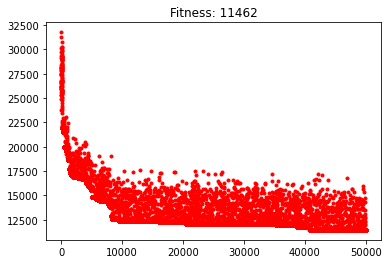

In [11]:
print('Algorithm: {}'.format(algorithm.get_name()))
print('Problem: {}'.format(myproblem.get_name()))
print('Solution: {}'.format(result.variables))
print('Fitness: {}'.format(result.objectives[0]))
print('Nb of evaluations: {}'.format(len(eval_fitness)))
print('Computing time: {}'.format(algorithm.total_computing_time))
plt.plot(eval_fitness, 'r.')
plt.title('Fitness: %d' % result.objectives[0])
plt.show()